In [1]:
import motion_util as u
import scatter_plot as s
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats
from scipy import stats
from sklearn.decomposition import PCA
from scipy.cluster.vq import kmeans,vq
a=u.motionUtil(['e7dee8c9d360'],windows=2.5)
a.fetch_data_from_csv('/Users/mingtak/Downloads/ASTRI/piegon/data/motion_label_20170302_e7dee8c9d360.csv')
def normalize_vector(feature_vector):
    return stats.boxcox(map(lambda y:abs(y),feature_vector))[0].tolist() # feature_vector

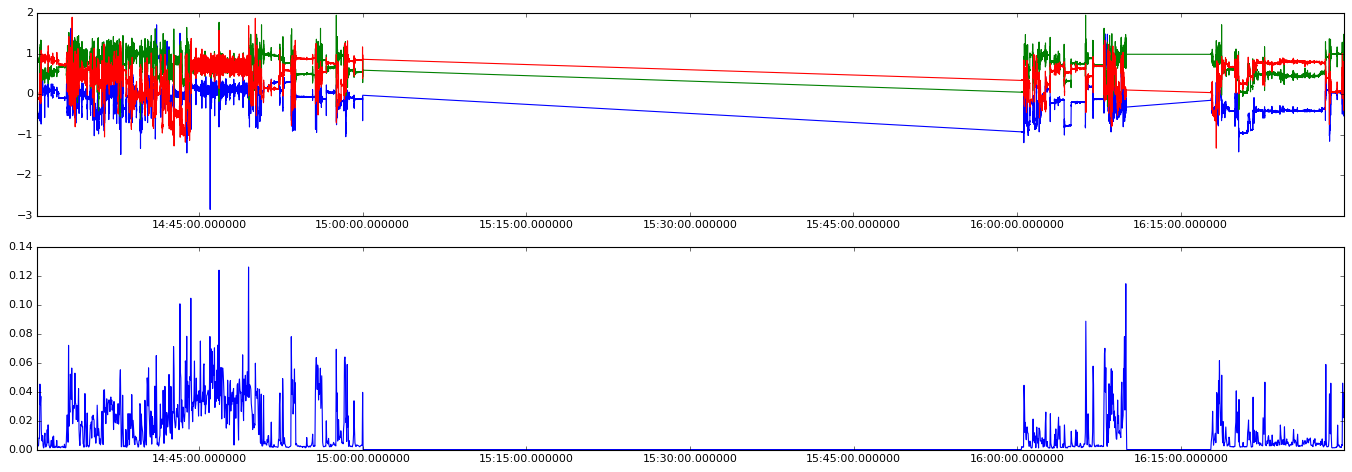

In [2]:
a.wristband_list
a.avcPlot()

Movement before outlier removal:  6
Turkey range:  129.5 133.5
Movement after outlier removal:  5


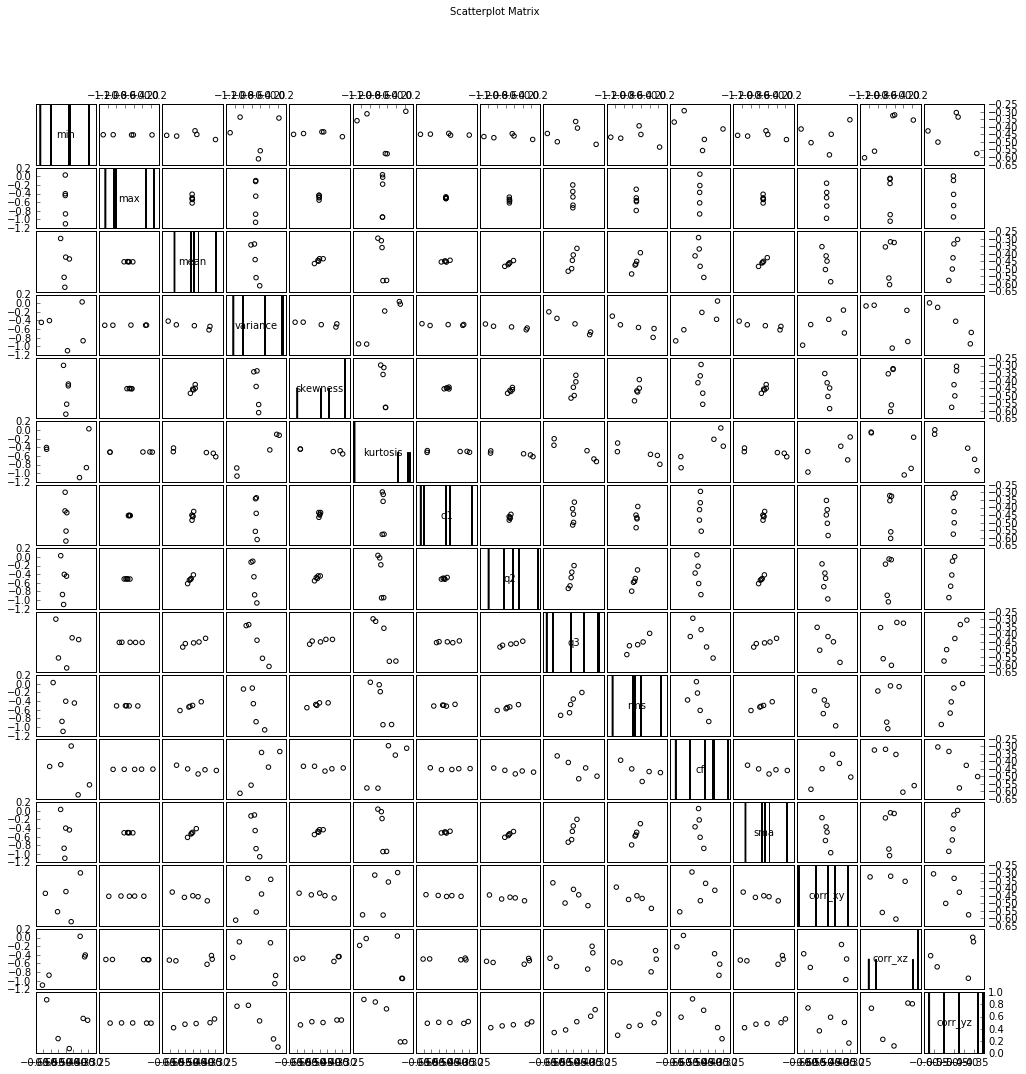

Explained variance [ 0.93174531  0.05933325  0.00831826]


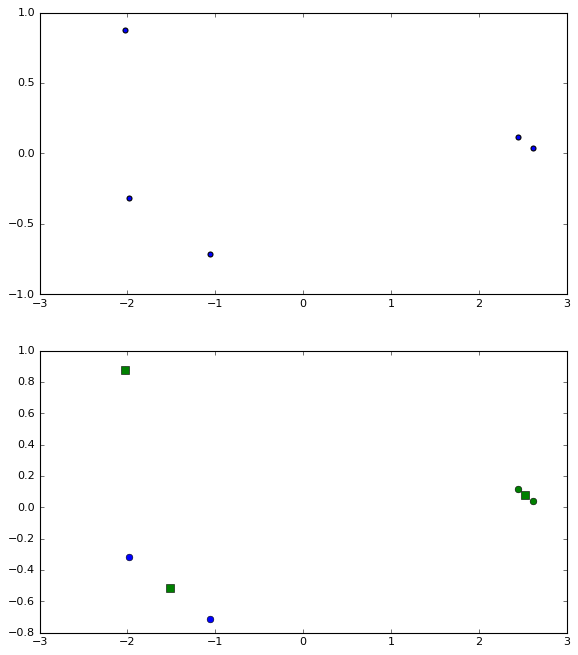

Category  0  characteristics


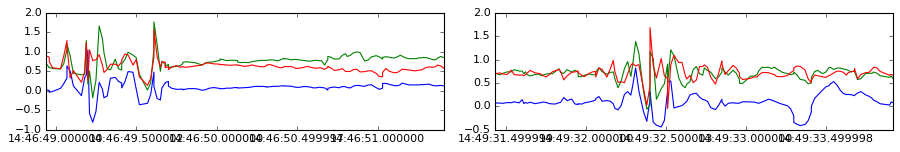

Category  1  characteristics


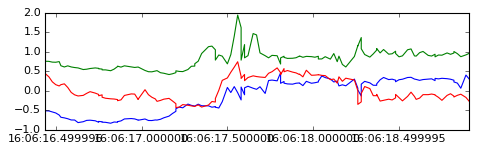

Category  2  characteristics


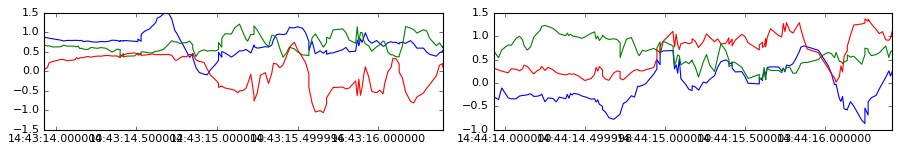

In [3]:
feature_vector=a.get_movement_feature(a.get_movement_segment(0.08))
normalized_vector=np.transpose(map(normalize_vector,np.transpose(map(lambda x:x['features'],feature_vector)).tolist()))
# print '\n'.join([str(mstats.normaltest(np.array(map(lambda x:(x[i]),normalized_vector)))) for i in range(12)])
fig = s.scatterplot_matrix(np.transpose(normalized_vector), 
['min', 'max', 'mean', 'variance', 'skewness', 'kurtosis', 'q1', 'q2', 'q3', 'rms', 'cf','sma','corr_xy','corr_xz','corr_yz'],color='black', facecolors='none')
fig.suptitle('Scatterplot Matrix')
plt.show()
fig = plt.figure( figsize=(8.5, 10), dpi=80)
pca = PCA(n_components=3)
X = pca.fit_transform(map(lambda x:x,normalized_vector))
# zip(map(lambda x:(x[0]),feature_vector),
print 'Explained variance',pca.explained_variance_ratio_
plt.subplot(2,1,1)
plt.scatter(map(lambda x:x[0],X),map(lambda x:x[1],X))
centroids,_ = kmeans(X,3)
idx,_ = vq(X,centroids)
plt.subplot(2,1,2)
plt.plot(X[idx==0,0],X[idx==0,1],'ob',
     X[idx==1,0],X[idx==1,1],'or',X[idx==2,0],X[idx==2,1],'og')
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
plt.show()
for i in range(3):
    cat_feature=filter(lambda x:x[1]==i,zip(feature_vector,idx))
    print "Category ",i," characteristics"
    fig = plt.figure( figsize=(17, 2*(len(cat_feature)/3+1)), dpi=80)
    for i in range(len(cat_feature)):
        obs = cat_feature[i][0]
        label = cat_feature[i][1]
        start=obs['info'][0]
        end=obs['info'][1]
        avc=obs['info'][2]
        m=a.filter_motion(a.sample,start,end)
        # print obs['features'],'category ' +str(label)+' '+str(len(m))
        plt.subplot(len(cat_feature)/3+1,3,i+1)
        # plt.ylim(-4, 4)
        a.motion_plot(m,plt)
    plt.tight_layout()
    plt.show()

In [4]:
feature_vector[2]

{'features': [0.47802710000000004,
  3.4536059999999997,
  1.558767425530303,
  2.1056403054558,
  0.14103683851224291,
  8.19048492329365,
  1.432678525,
  1.5120845000000001,
  1.5745240000000003,
  1.6030359523444233,
  2.154415810168909,
  1.5587674255303028,
  0.3853729484596804,
  0.05577791748373543,
  0.43958528969666344],
 'info': (1488437208.93, 1488437211.43, 0.12396768330987948, 132)}